# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [274]:
pip install palmerpenguins

In [275]:
import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures



penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [276]:
data = pd.get_dummies(penguins, columns=['species', 'island', 'sex'])
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [277]:
data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year',
                          'species_Adelie', 'species_Chinstrap', 'species_Gentoo',
                          'island_Biscoe', 'island_Dream', 'island_Torgersen',
                          'sex_female', 'sex_male']]
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [278]:
lr = LinearRegression()

Linear Regression

In [279]:
data = data.dropna()
y = data['bill_depth_mm']
X = data[['bill_length_mm']]

In [280]:
lr_fit = lr.fit(X, y)
data["lrpredict"] = lr_fit.predict(X)
lr_fit.coef_
data

<ipython-input-280-419ec6c9c5ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,lrpredict
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True,17.561136
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False,17.527128
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False,17.459111
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False,17.765187
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True,17.544132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True,16.141281
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False,17.187043
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True,16.668413
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True,16.566387


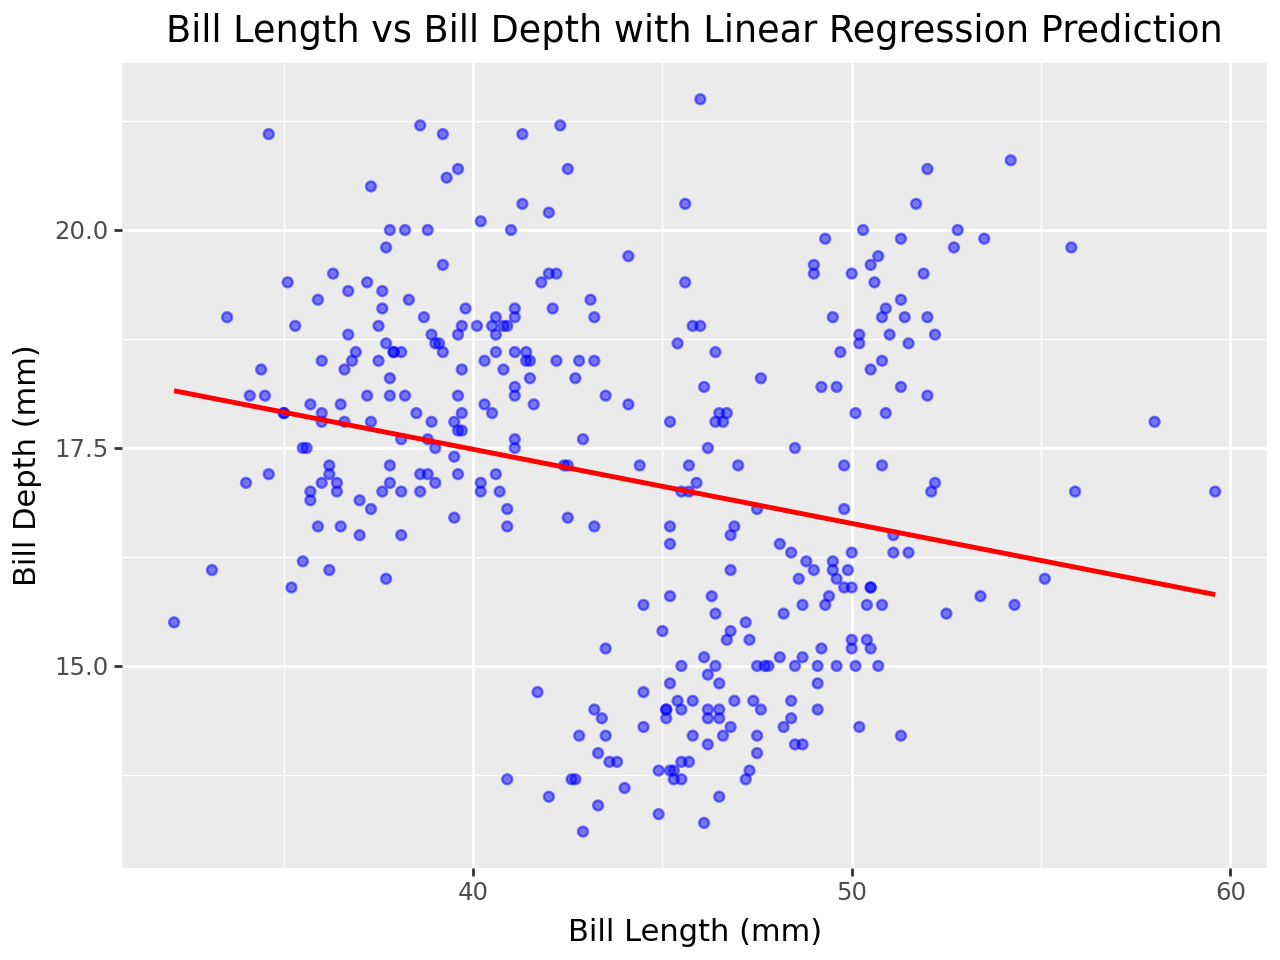

In [281]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5, color="blue") +  # Scatter plot for actual data points
    geom_line(aes(y='lrpredict'), color="red", size=1) +  # Line for predictions
    labs(
        title="Bill Length vs Bill Depth with Linear Regression Prediction",
        x="Bill Length (mm)",
        y="Bill Depth (mm)"
    )

)

quadratic

In [282]:
data['quadratic'] = data['bill_length_mm']**2
Xquad = data[['bill_length_mm', 'quadratic']]

<ipython-input-282-b02ce9112830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [283]:
lr_fitquad = lr.fit(Xquad, y)
data["lrpredictquad"] = lr_fitquad.predict(Xquad)
lr_fit.coef_
data

<ipython-input-283-ab8bac435f14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male,lrpredict,quadratic,lrpredictquad
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True,17.561136,1528.81,17.484121
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False,17.527128,1560.25,17.392292
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False,17.459111,1624.09,17.223194
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False,17.765187,1346.89,18.136996
5,39.3,20.6,190.0,3650.0,2007,True,False,False,False,False,True,False,True,17.544132,1544.49,17.437600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True,16.141281,3113.64,17.778189
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False,17.187043,1892.25,16.740902
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True,16.668413,2460.16,16.681811
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True,16.566387,2580.64,16.803027


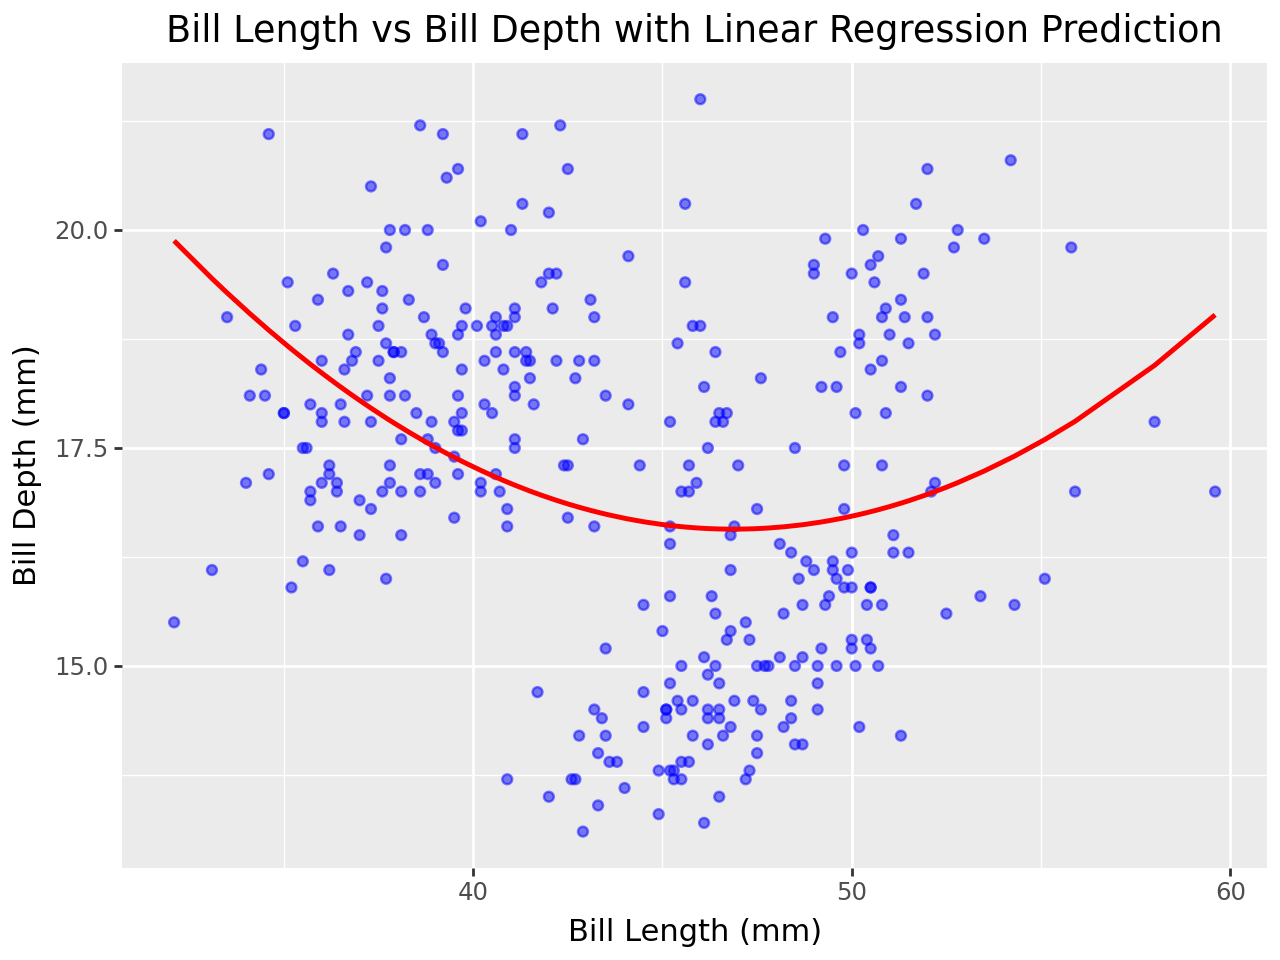

In [284]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5, color="blue") +  # Scatter plot for actual data points
    geom_line(aes(y='lrpredictquad'), color="red", size=1) +  # Line for predictions
    labs(
        title="Bill Length vs Bill Depth with Linear Regression Prediction",
        x="Bill Length (mm)",
        y="Bill Depth (mm)"
    )

)

cubic

In [285]:
data['cubic'] = data['bill_length_mm']**3
Xcube = data[['bill_length_mm', 'quadratic', 'cubic']]

<ipython-input-285-c2e7309d19fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [286]:
lr_fitcube = lr.fit(Xcube, y)
data["lrpredictcube"] = lr_fitcube.predict(Xcube)
lr_fitcube.coef_
#data

<ipython-input-286-bcf69c20743e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([ 7.00494111e+00, -1.74355549e-01,  1.40554271e-03])

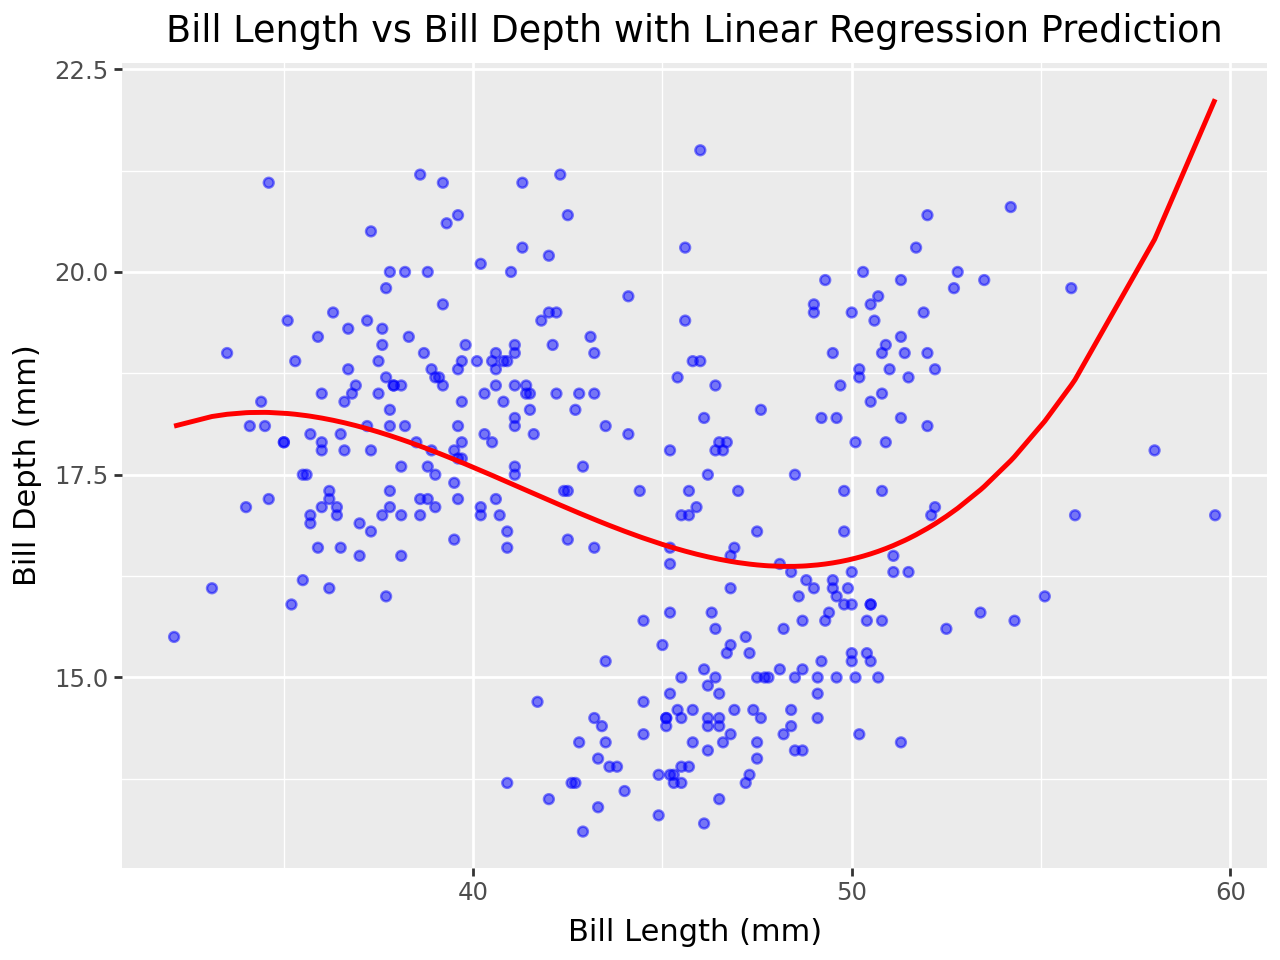

In [287]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5, color="blue") +  # Scatter plot for actual data points
    geom_line(aes(y='lrpredictcube'), color="red", size=1) +  # Line for predictions
    labs(
        title="Bill Length vs Bill Depth with Linear Regression Prediction",
        x="Bill Length (mm)",
        y="Bill Depth (mm)"
    )

)

degree 10

In [288]:
data['Quartic'] = data['bill_length_mm']**4
data['Quintic'] = data['bill_length_mm']**5
data['Sextic'] = data['bill_length_mm']**6
data['Septic'] = data['bill_length_mm']**7
data['Octic'] = data['bill_length_mm']**8
data['Nonic'] = data['bill_length_mm']*9
data['Decic'] = data['bill_length_mm']**10
XDecic = data[['bill_length_mm', 'quadratic', 'cubic', 'Quartic', 'Quintic', 'Sextic', 'Septic', 'Octic', 'Nonic', 'Decic']]

<ipython-input-288-b81c4f09c591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-288-b81c4f09c591>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-288-b81c4f09c591>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-288-b81c4f09c

In [289]:
lr_fitdecic = lr.fit(XDecic, y)
data["lrpredictdecic"] = lr_fitdecic.predict(XDecic)
lr_fitdecic.coef_

<ipython-input-289-0c7a9f4255b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([-1.50504755e-06, -7.60934209e-05, -9.85616941e-04, -1.00451896e-02,
        8.81319271e-04, -3.09955525e-05,  5.25109211e-07, -3.78814250e-09,
       -1.35454279e-05,  9.46275529e-14])

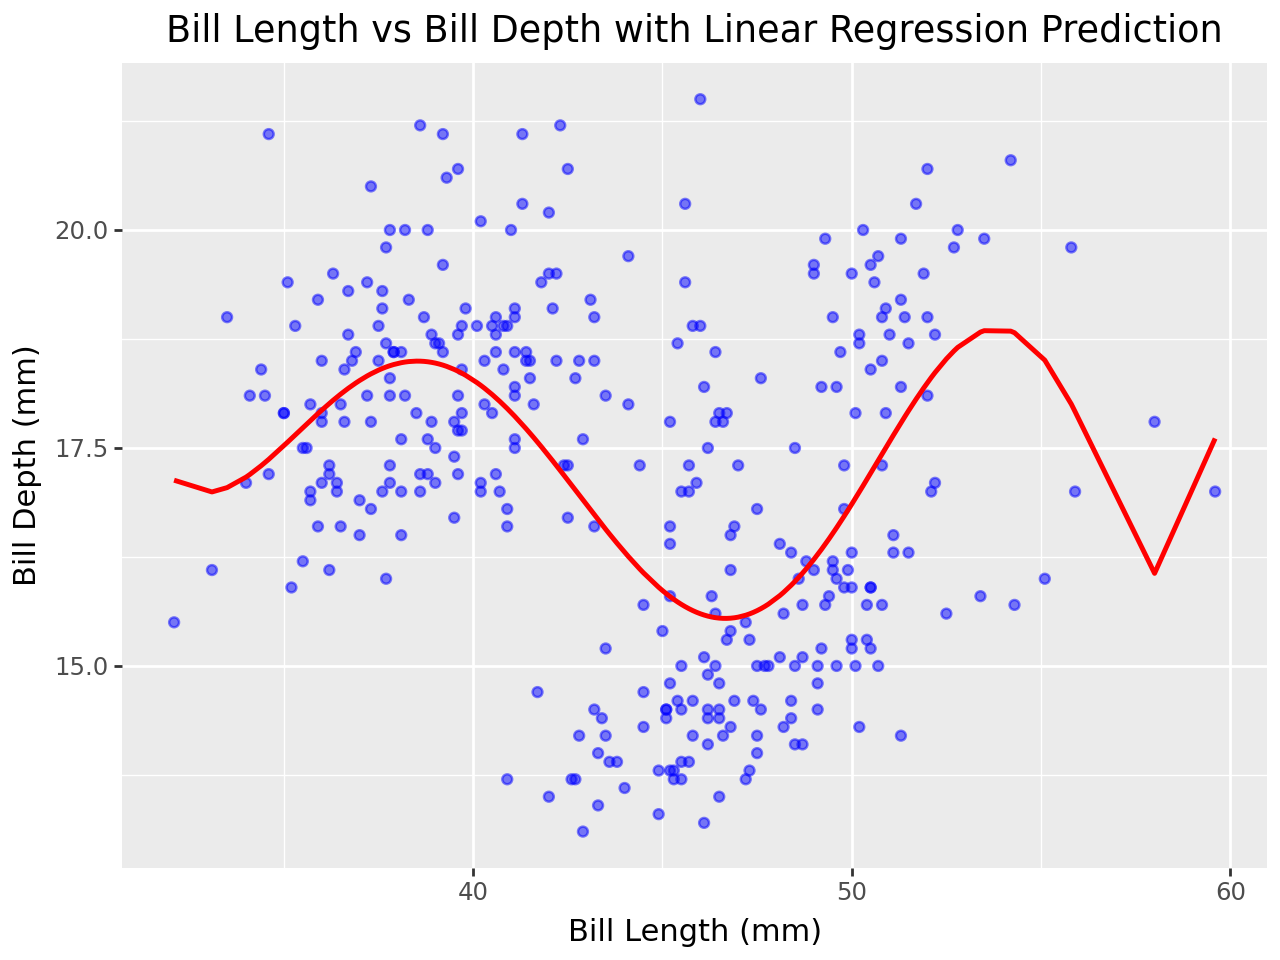

In [290]:
(ggplot(data, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5, color="blue") +  # Scatter plot for actual data points
    geom_line(aes(y='lrpredictdecic'), color="red", size=1) +  # Line for predictions
    labs(
        title="Bill Length vs Bill Depth with Linear Regression Prediction",
        x="Bill Length (mm)",
        y="Bill Depth (mm)"
    )

)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

In [291]:
X

,bill_length_mm
0,39.1
1,39.5
2,40.3
4,36.7
5,39.3
...,...
339,55.8
340,43.5
341,49.6
342,50.8


In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
XQ_train, XQ_test, yQ_train, yQ_test = train_test_split(Xquad, y, test_size=0.25)
XD_train, XD_test, yD_train, yD_test = train_test_split(XDecic, y, test_size=0.25)


In [293]:
lr = LinearRegression()

In [294]:
lr_fit1 = lr.fit(X_train, y_train)
y_pred_lr = lr_fit1.predict(X_test)
y_pred_lrT = lr_fit1.predict(X_train)

msetest = mean_squared_error(y_test, y_pred_lr)
msetrain = mean_squared_error(y_train, y_pred_lrT)
R2test = r2_score(y_test, y_pred_lr)
R2train = r2_score(y_train, y_pred_lrT)

print(msetrain)
print(msetest)
print(R2train)
print(R2test)

3.6080186591535375
3.878978487663786
0.05106020170991599
0.055558704715195306


In [295]:
lr_fitQ = lr.fit(XQ_train, yQ_train)
y_pred_lrQ = lr_fitQ.predict(XQ_test)
y_pred_lrQT = lr_fitQ.predict(XQ_train)

msetestQ = mean_squared_error(yQ_test, y_pred_lrQ)
msetrainQ = mean_squared_error(yQ_train, y_pred_lrQT)
R2testQ = r2_score(yQ_test, y_pred_lrQ)
R2trainQ = r2_score(yQ_train, y_pred_lrQT)

print(msetrainQ)
print(msetestQ)
print(R2trainQ)
print(R2testQ)

3.3871895572335724
3.6690313440654094
0.13741666170762357
0.027453570073303735


In [296]:
lr_fitD = lr.fit(XD_train, yD_train)
y_pred_lrD = lr_fitD.predict(XD_test)
y_pred_lrDT = lr_fitD.predict(XD_train)

msetestD = mean_squared_error(yD_test, y_pred_lrD)
msetrainD = mean_squared_error(yD_train, y_pred_lrDT)
R2testD = r2_score(yD_test, y_pred_lrD)
R2trainD = r2_score(yD_train, y_pred_lrDT)

print(msetrainD)
print(msetestD)
print(R2trainD)
print(R2testD)

2.684667820733305
3.0335705971056712
0.2998232975256969
0.24318856067034278


Are any of the models above underfitting the data? If so, which ones and how can you tell?
The first model is underfitting the data, for both train and test the R^2 is less than 6%
Are any of the models above overfitting the data? If so, which ones and how can you tell?
The second model is overfitting the model since the test R^2 is good but the train R^2 is very low

The second model is overfitting the data
Which of the above models do you think fits the data best and why?
The decic model fits the data the best, it has a high R^2 for test and train as well as a low RMSE for test and train